In [33]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [34]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('sox_io')

import matplotlib.pyplot as plt
import requests
from utils import *
from wingbeat_datasets import *
from wingbeat_models import *


In [35]:
num_epochs = 35
batch_size = 32
batch_size_val = batch_size * 2
validation_split = .2
shuffle_dataset = True
num_workers = psutil.cpu_count()
random_seed= 42
setting = 'raw'
modeltype = 'conv1draw'
normalize = ''#"sample"

fs = 8000

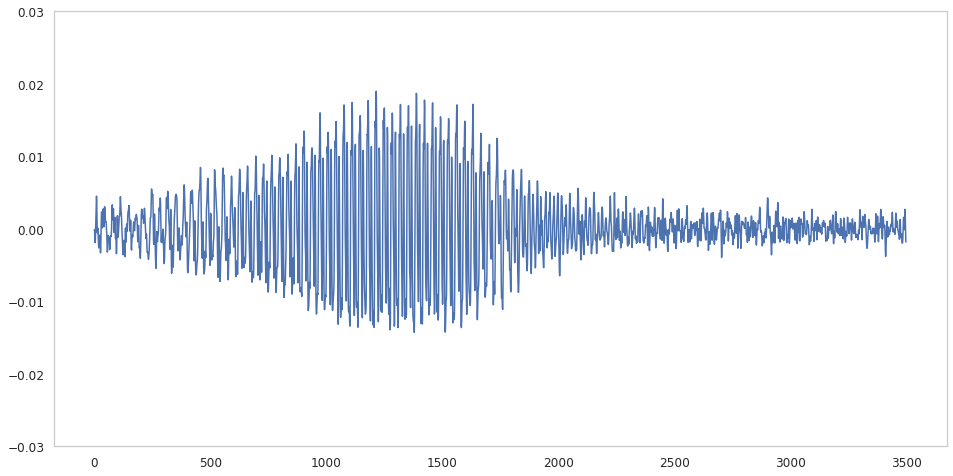

In [106]:
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(16,8))
sig = wbdset[14][0].numpy().T[:3500]
plt.plot(sig)
plt.ylim(-.03,.03)
plt.grid(False)
plt.savefig('/home/kalfasyan/Desktop/raw.eps', bbox_inches='tight', format='eps')

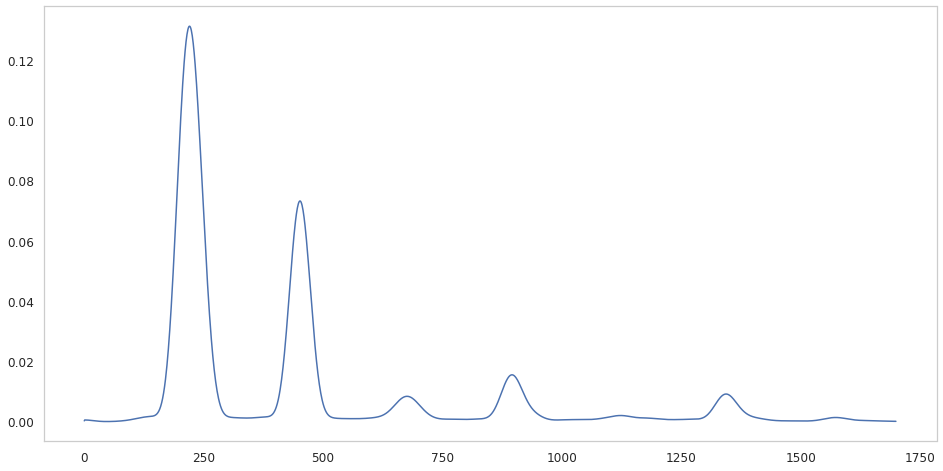

In [104]:
plt.figure(figsize=(16,8))

psd = psdset[0][0].T[:1700]
plt.plot(psd)
plt.grid(False)
plt.savefig('/home/kalfasyan/Desktop/psd.eps', bbox_inches='tight', format='eps')

In [94]:
from torchaudio.transforms import AmplitudeToDB, MelSpectrogram, Spectrogram

spec = Spectrogram(n_fft=256, hop_length=42)(wbdset[0][0])
spec = AmplitudeToDB()(spec)
spec = torch.from_numpy(np.repeat(spec.numpy()[...,np.newaxis],3,0))
# spec

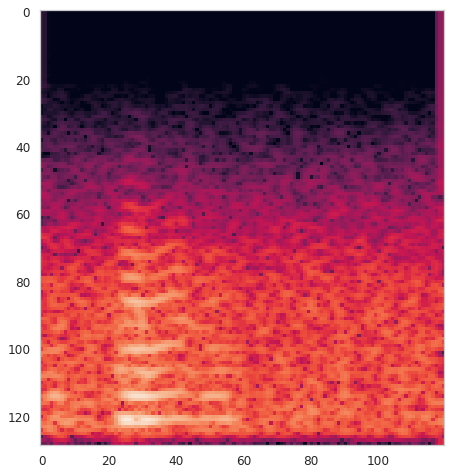

In [101]:
plt.figure(figsize=(16,8))

plt.imshow(np.flipud(spec[0,:,:,0]))
plt.savefig('/home/kalfasyan/Desktop/stft.eps', bbox_inches='tight', format='eps')